# CS7DS1 Data Analytics: Lab 1

## Determining Prior

$f(\lambda) = \alpha e^{-\alpha\lambda}$

$P(\lambda < 5) = 0.8$

$0.8 = \int_0^5 \alpha e^{-\alpha\lambda} \, d\lambda = 1 - e^{-5\alpha}$

$\alpha = \frac{\ln(5)}{5} \approx 0.3218$

$f(\lambda) = 0.3218 e^{-0.3218\lambda}$

## Determining Posterior

$f(\lambda | x_i) \propto f(\lambda)L(\lambda) \propto \alpha e^{-\alpha\lambda} \cdot \frac{e^{-n\lambda}\lambda^{\Sigma x_i}}{\Pi (x_i!)} \propto \alpha e^{-(\alpha + n)\lambda} \lambda^{\Sigma x_i}$

$f(x) = G(\lambda, n) = \frac{(\lambda x)^{n - 1}}{\Gamma(n)} \lambda e^{-\lambda x}$

$\lambda \rightarrow \alpha + n, n \rightarrow \Sigma x_i + 1$

$f(\lambda | x_i) \rightarrow G(\lambda = \alpha + n, n = \Sigma x_i + 1)$

$\Sigma x_i = f_0 \cdot 0 + (18 - f_0) \cdot 1 + 13 \cdot 2 + \cdots + 1 \cdot 10 = 128 - f_0$

$f(\lambda | x_i) \sim G(\frac{ln(5)}{5} + 50, 129 - f_0)$

$P_0 = \frac{e^{-\lambda}\lambda^0}{0!} = e^{-\lambda}$

$\theta_0 = \frac{P_0}{P_0 + P_1} = \frac{1}{1 + \lambda}$

$\theta_0 \sim B(n = 18, p = \frac{1}{1 + \lambda})$

## Gibbs Sampling

$f(\lambda | f_0, x_i),\, f_0 = 18\theta_0$

$f(\theta_0 | \lambda, x_i)$

[1] "f0 = 12.573000, lambda = 0.431291"

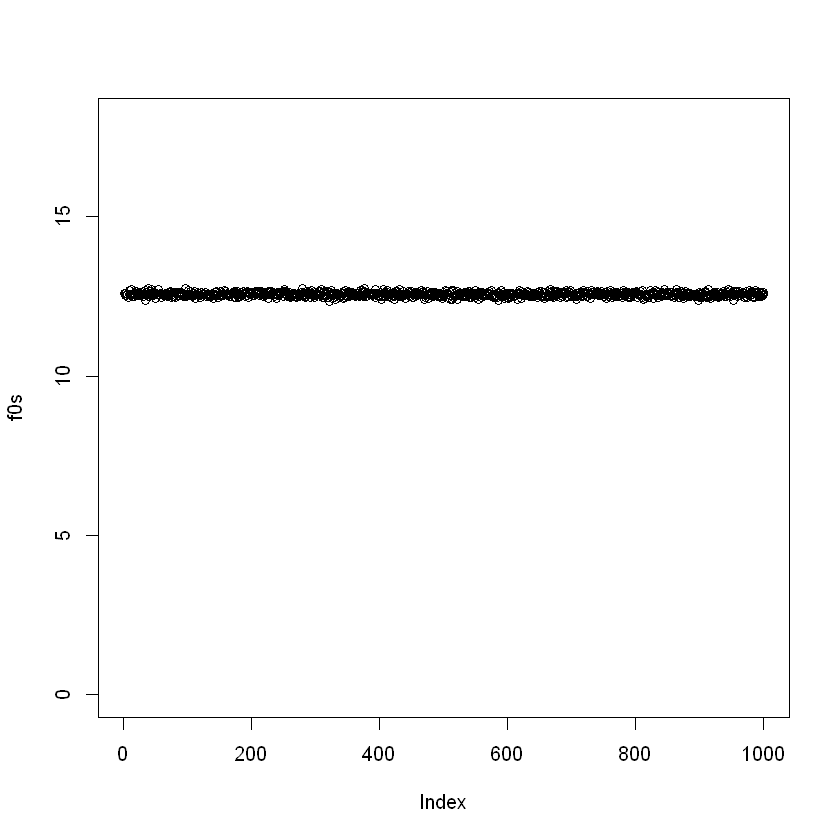

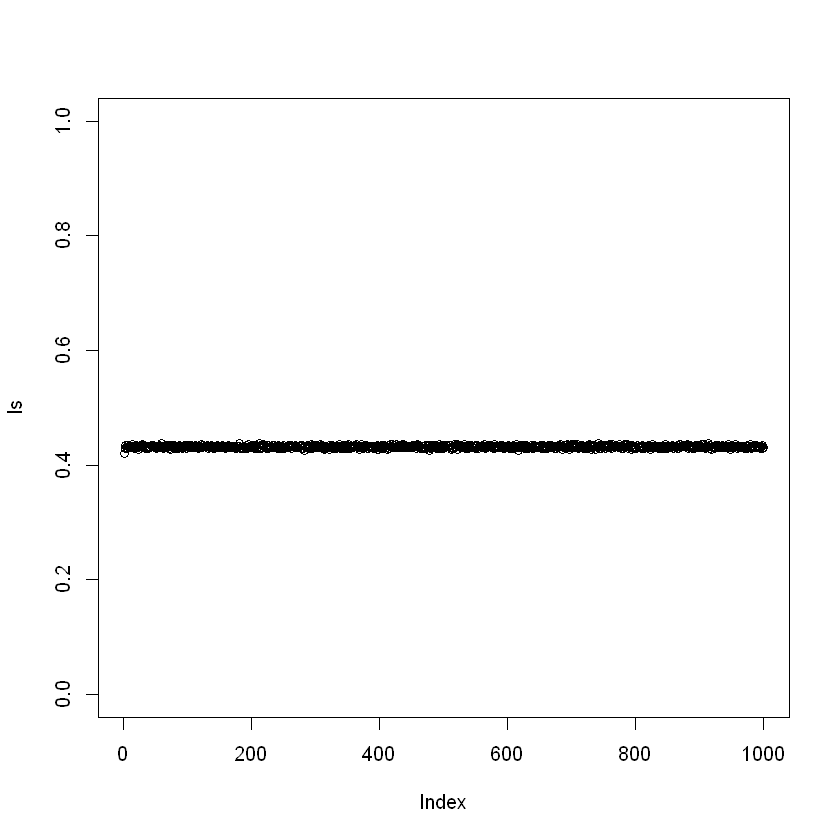

In [93]:
f0 <- 9
l <- 1
f0s <- matrix(ncol=1, nrow=1000)
ls <- matrix(ncol=1, nrow=1000)
for (i in 2:1000) {
    l <- mean(rgamma(1000, 50.3218, 129 - f0))
    f0 <- mean(rbinom(1000, 18, 1/(1 + l)))
    f0s[i,] <- f0
    ls[i,] <- l
}
sprintf("f0 = %f, lambda = %f", f0, l)
plot(f0s, ylim=c(0, 18))
plot(ls, ylim=c(0, 1))